### 1. Keras 를 활용한 인공 신경망 구현

In [1]:
#!pip install tensorflow

import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dataset = datasets.load_digits()
x_data = dataset.data
y_data = dataset.target

# y_data = (dataset.target).astype(np.float32)
x_data = (dataset.data).astype(np.float32)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                        test_size=0.0055, random_state=7777)
x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, 10) 
y_test = tf.keras.utils.to_categorical(y_test, 10)


model = keras.Sequential([
    keras.layers.Flatten(input_dim=x_train.shape[1]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy')
model.fit(x_train, y_train, epochs= 100)
predictions = model.predict(x_test)

Epoch 1/100
56/56 [==============================] - 1s 3ms/step - loss: 2.3016
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 2.2979
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 2.2949
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 2.2926
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 2.2909
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 2.2895
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - loss: 2.2884
Epoch 8/100
56/56 [==============================] - 0s 3ms/step - loss: 2.2873
Epoch 9/100
56/56 [==============================] - 0s 3ms/step - loss: 2.2862
Epoch 10/100
56/56 [==============================] - 0s 3ms/step - loss: 2.2851
Epoch 11/100
56/56 [==============================] - 0s 3ms/step - loss: 2.2839
Epoch 12/100
56/56 [==============================] - 0s 3ms/step - loss: 2.2830
Epoch 13/100
56/56 [=================

### 2. 테스트 이미지 출력 및 정답과 예측 값 출력

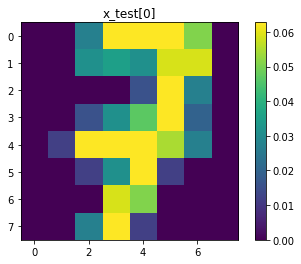

정답: 7
예측 값: 7


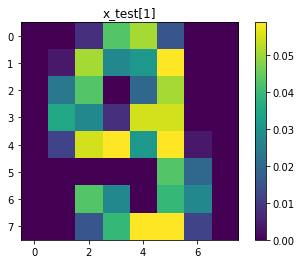

정답: 9
예측 값: 3


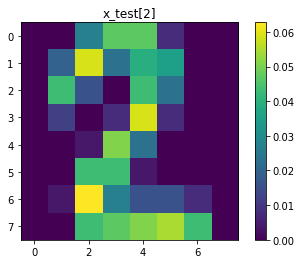

정답: 2
예측 값: 2


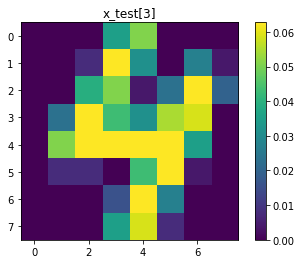

정답: 4
예측 값: 4


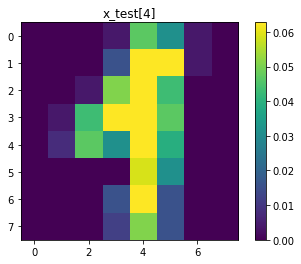

정답: 1
예측 값: 1


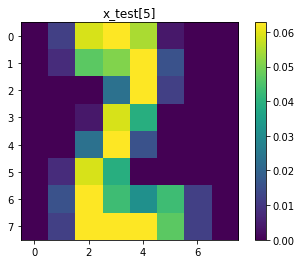

정답: 2
예측 값: 2


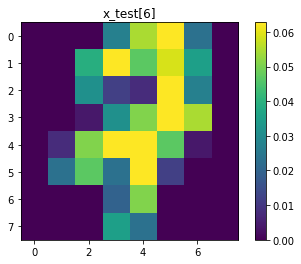

정답: 7
예측 값: 4


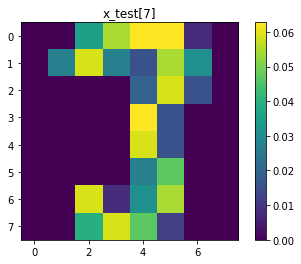

정답: 3
예측 값: 3


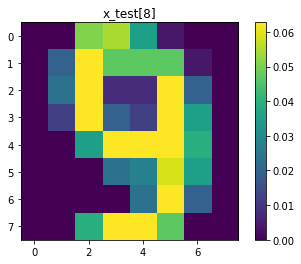

정답: 9
예측 값: 3


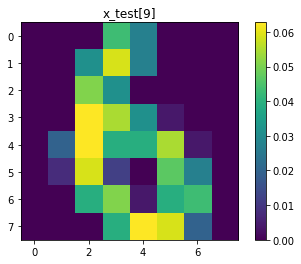

정답: 6
예측 값: 6


In [2]:
predictions_labels = []

for p in predictions:
    predictions_labels.append(np.argmax(p))
    

y_test_labels = []

for p in range(0,len(y_test)):
    y_test_labels.append(np.argmax(y_test[p]))

for i in range(0,len(x_test)) : 
    plt.figure(i)
    plt.imshow(x_test[i].reshape(8,8))
    plt.title(f"x_test[{i}]")
    plt.colorbar()
    plt.show()
    print("정답:", y_test_labels[i])
    print("예측 값:", predictions_labels[i])

### 3. Confusion matrix와 Performance report 생성

In [3]:
print("Confusion matrix:",'\n',confusion_matrix(y_test_labels,predictions_labels))
print('\n')
print("classification_report:",'\n',classification_report(y_test_labels, predictions_labels))

Confusion matrix: 
 [[1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 1 0]
 [0 0 2 0 0 0 0]]


classification_report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.33      1.00      0.50         1
           4       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         2

    accuracy                           0.70        10
   macro avg       0.69      0.79      0.69        10
weighted avg       0.68      0.70      0.65        10



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
